<a href="https://colab.research.google.com/github/1di0t/DeepLearning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 새 섹션

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


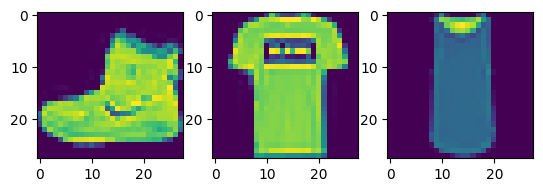

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [ ]:
print(train_labels[:3])#https://keras.io/api/datasets/fashion_mnist/

[9 0 0]


In [ ]:
#learning
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.8240 - accuracy: 0.6798
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6966 - accuracy: 0.7564
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6115 - accuracy: 0.7815
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5602 - accuracy: 0.8021
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5343 - accuracy: 0.8148


In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"손실 : {test_loss} 정확도 : {test_acc}")

313/313 - 1s - loss: 0.5440 - accuracy: 0.8228 - 540ms/epoch - 2ms/step
손실 : 0.5440472364425659 정확도 : 0.8227999806404114


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
import numpy as np

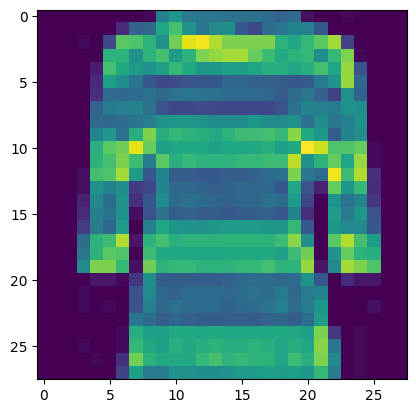

In [ ]:
randIdx = np.random.randint(0,1000)
plt.imshow(test_images[randIdx])

In [ ]:
yhat = model.predict(test_images[randIdx][np.newaxis,:,:])
yhat

1/1 [==============================] - 0s 58ms/step


array([[9.1298884e-01, 4.5040717e-05, 4.6906094e-05, 3.5351820e-03,
        3.9954696e-07, 2.7216962e-19, 8.3376572e-02, 0.0000000e+00,
        7.0563583e-06, 0.0000000e+00]], dtype=float32)

In [ ]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis,:,:]))
yhat

1/1 [==============================] - 0s 23ms/step


0

In [ ]:
class_names=['T-shirt/top','Trousrer','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
yhat = np.argmax(model.predict(test_images[randIdx][np.newaxis,:,:]))
print(class_names[yhat])

1/1 [==============================] - 0s 23ms/step
T-shirt/top


In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(train_images,train_labels,epochs=10)

Epoch 1/10
 546/1875 [=======>......................] - ETA: 4s - loss: 3.9845 - accuracy: 0.6837

KeyboardInterrupt: 

In [ ]:
pred_1 = model.predict(test_images)
pred_2 = model2.predict(test_images)
pred_1,pred_2

In [ ]:
y_hat1 = np.argmax(pred_1,axis=1)
y_hat2 = np.argmax(pred_2,axis=1)
y_hat1, y_hat2

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(test_labels,y_hat1)
conf_mat2 = confusion_matrix(test_labels,y_hat2)
plt.matshow(conf_mat1)
plt.matshow(conf_mat2)

# 새 섹션

In [ ]:
#!git clone https://github.com/taehojo/data.git

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/data/pima-indians-diabetes3.csv")

In [ ]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['diabetes']

,diabetes
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


from matplotlib import pyplot as plt
_df_0['pregnant'].plot(kind='hist', bins=20, title='pregnant')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['plasma'].plot(kind='hist', bins=20, title='plasma')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['thickness'].plot(kind='hist', bins=20, title='thickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='pregnant', y='plasma', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='plasma', y='pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pressure', y='thickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='thickness', y='insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['pregnant'].plot(kind='line', figsize=(8, 4), title='pregnant')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['plasma'].plot(kind='line', figsize=(8, 4), title='plasma')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['pressure'].plot(kind='line', figsize=(8, 4), title='pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['thickness'].plot(kind='line', figsize=(8, 4), title='thickness')
plt.gca().spines[['top', 'right']].set_visible(False)